<a href="https://colab.research.google.com/github/NarayaniSuresh/CSE340/blob/main/Lab_7_Implement_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [4]:
# Step 2: Load the Dataset
data = pd.read_csv("PJME_hourly.csv")




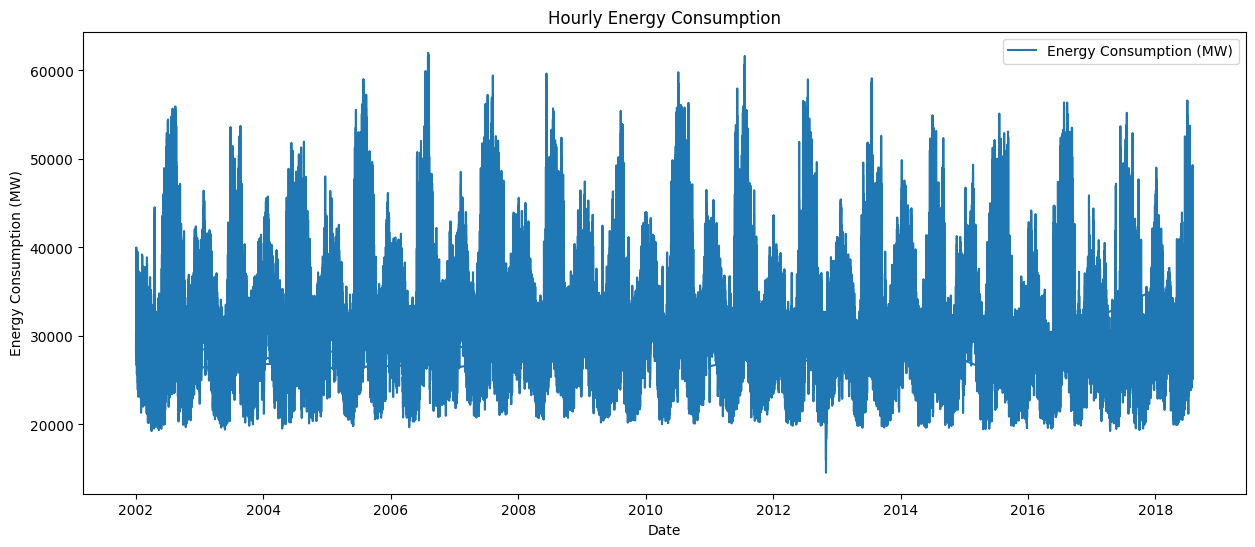

In [28]:
# Step 3: Plot the Dataset
plt.figure(figsize=(15, 6))
plt.plot(data['Datetime'], data['PJME_MW'], label='Energy Consumption (MW)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.title('Hourly Energy Consumption')
plt.legend()
plt.show()


In [6]:

# Step 4: Split the Data
train_size = int(len(data) * 0.8)  # 80% training data
train_data, test_data = data[:train_size], data[train_size:]



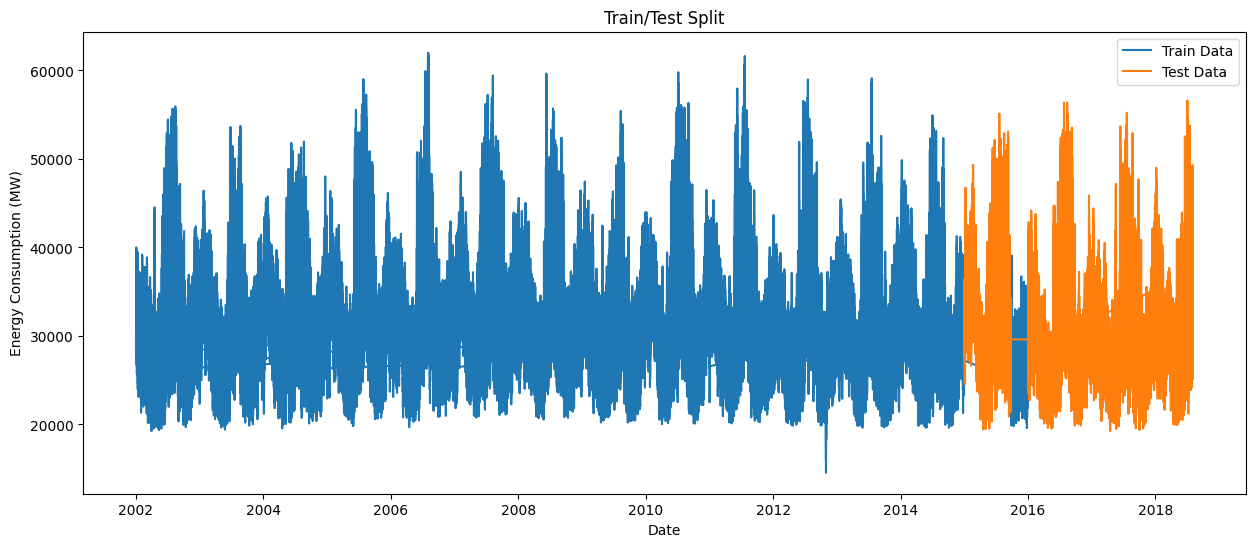

In [29]:
# Step 5: Visualization of Train/Test Split Based on Time
plt.figure(figsize=(15, 6))
plt.plot(train_data['Datetime'], train_data['PJME_MW'], label='Train Data')
plt.plot(test_data['Datetime'], test_data['PJME_MW'], label='Test Data')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.title('Train/Test Split')
plt.legend()
plt.show()


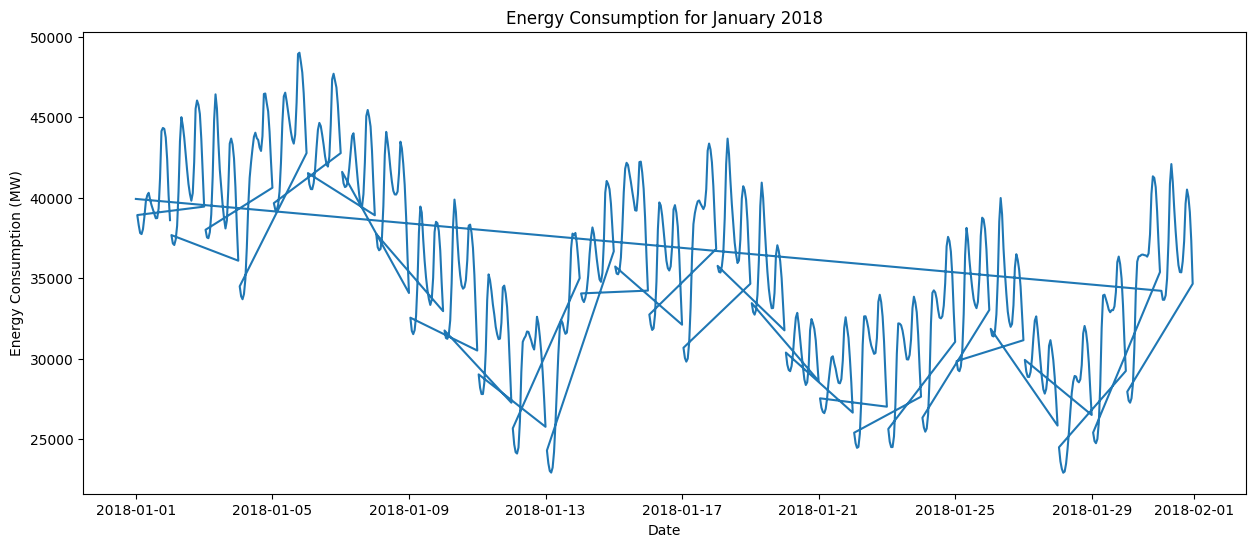

In [9]:

# Step 6: Plotting a Specific Time Range from the Dataset
specific_range = data[(data['Datetime'] >= '2018-01-01') & (data['Datetime'] < '2018-02-01')]
plt.figure(figsize=(15, 6))
plt.plot(specific_range['Datetime'], specific_range['PJME_MW'])
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.title('Energy Consumption for January 2018')
plt.show()



In [8]:
# Step 7: Creating Time-based Features
data['Datetime'] = pd.to_datetime(data['Datetime'])
data['Hour'] = data['Datetime'].dt.hour
data['DayOfWeek'] = data['Datetime'].dt.dayofweek
data['Month'] = data['Datetime'].dt.month



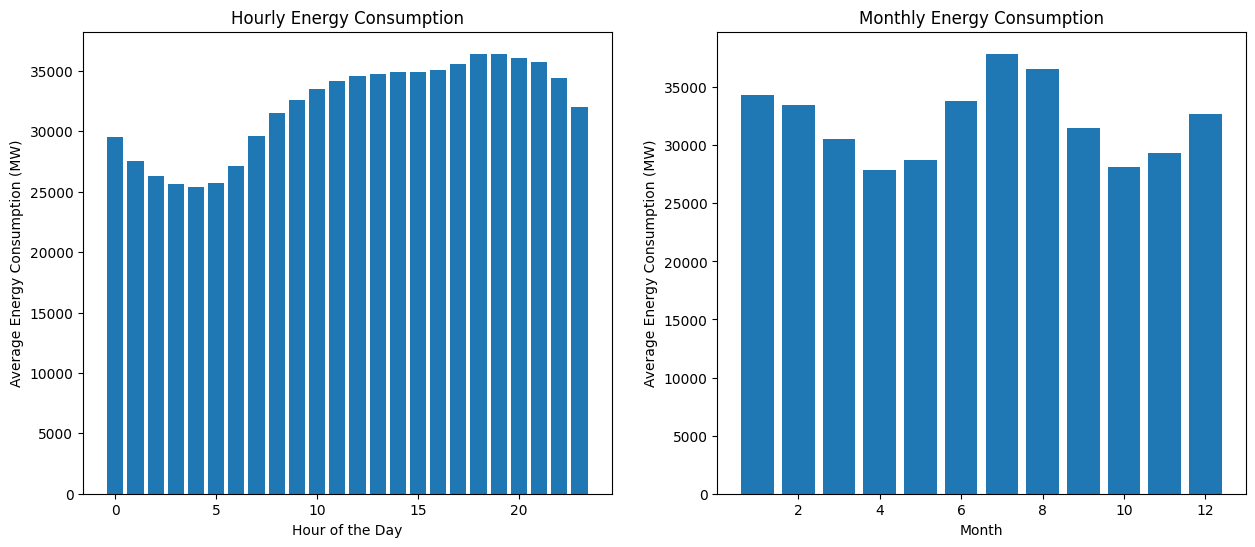

In [10]:
# Step 8: Visualize Feature Dataset by Hour/Month
hourly_avg = data.groupby('Hour')['PJME_MW'].mean()
monthly_avg = data.groupby('Month')['PJME_MW'].mean()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(hourly_avg.index, hourly_avg.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption (MW)')
plt.title('Hourly Energy Consumption')

plt.subplot(1, 2, 2)
plt.bar(monthly_avg.index, monthly_avg.values)
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (MW)')
plt.title('Monthly Energy Consumption')
plt.show()



In [15]:
train_data['Datetime'] = pd.to_datetime(train_data['Datetime'])


<ipython-input-15-e54f24ddb1b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Datetime'] = pd.to_datetime(train_data['Datetime'])


In [16]:
train_data['Hour'] = train_data['Datetime'].dt.hour

<ipython-input-16-232cd8c6b52c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Hour'] = train_data['Datetime'].dt.hour


In [17]:
train_data['DayOfWeek'] = train_data['Datetime'].dt.dayofweek

<ipython-input-17-0ff1d03c9c8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['DayOfWeek'] = train_data['Datetime'].dt.dayofweek


In [18]:
train_data['Month'] = train_data['Datetime'].dt.month

<ipython-input-18-4a14d3de7790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Month'] = train_data['Datetime'].dt.month


In [19]:
test_data['Datetime'] = pd.to_datetime(test_data['Datetime'])

<ipython-input-19-9f161389de68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Datetime'] = pd.to_datetime(test_data['Datetime'])


In [20]:
test_data['Hour'] = test_data['Datetime'].dt.hour

<ipython-input-20-7405a13a40d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Hour'] = test_data['Datetime'].dt.hour


In [21]:
test_data['DayOfWeek'] = test_data['Datetime'].dt.dayofweek

<ipython-input-21-5eedeb4bc4bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['DayOfWeek'] = test_data['Datetime'].dt.dayofweek


In [22]:
train_data = train_data.copy()
train_data['Datetime'] = pd.to_datetime(train_data['Datetime'])
train_data['Hour'] = train_data['Datetime'].dt.hour
train_data['DayOfWeek'] = train_data['Datetime'].dt.dayofweek
train_data['Month'] = train_data['Datetime'].dt.month

In [23]:
test_data = test_data.copy()
test_data['Datetime'] = pd.to_datetime(test_data['Datetime'])
test_data['Hour'] = test_data['Datetime'].dt.hour
test_data['DayOfWeek'] = test_data['Datetime'].dt.dayofweek
test_data['Month'] = test_data['Datetime'].dt.month

In [24]:
X_train = train_data[['Hour', 'DayOfWeek', 'Month']]
y_train = train_data['PJME_MW']

X_test = test_data[['Hour', 'DayOfWeek', 'Month']]
y_test = test_data['PJME_MW']

model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
print(train_data.columns)

Index(['Datetime', 'PJME_MW'], dtype='object')


In [25]:

# Step 10: Feature Importance Analysis and Predictions
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)

predictions = model.predict(X_test)



Feature Importances: [0.50780845 0.13800918 0.35418236]


In [26]:
# Step 11: Merging Predictions into Original Dataset
test_data['Predictions'] = predictions



In [27]:
# Step 12: Calculate the Errors and Find the Best and Worst Predictions
mae = mean_absolute_error(test_data['PJME_MW'], test_data['Predictions'])
mse = mean_squared_error(test_data['PJME_MW'], test_data['Predictions'])

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 3012.949684157237
Mean Squared Error: 14644720.26841236
